<a href="https://colab.research.google.com/github/Madhusti-D/ML-CS-5783/blob/main/Assignment_1_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

# **Implementing Gradient Descent linear regression model without bias functions**

1. As mentioned in the problem statement, the given datasets are visualized in block [4] and [5].


> 2a. The relationship is non-linear which can be interpreted from the step 1 or question 1



> 2b. i. We can do feature engineering by updating the one input feature variable to its power of degree based on the requirement of the model fit we need.
For example, x is a data feature and it has only one feature, it can feature engineered by updting x to x^2 or x^3 or x^5 and so on.




> 2b. ii. We need feature engineering to add non-linearity and for this assignment I have implemented polynomial basis function. Results can be interpreted from the plots









In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading training data files

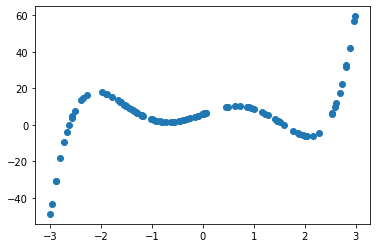

In [4]:
X_train = np.load('/content/drive/MyDrive/CS5783 Assignment/Assignment 1/x_train.npy')
Y_train = np.load('/content/drive/MyDrive/CS5783 Assignment/Assignment 1/y_train.npy')

X_train = X_train.tolist()
Y_train = Y_train.tolist()

X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
Y_train = Y_train.reshape(100,1)

plt.scatter(X_train,Y_train)
plt.show()

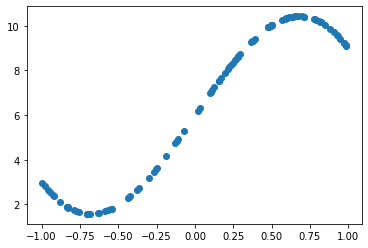

In [5]:
X_test = np.load('/content/drive/MyDrive/CS5783 Assignment/Assignment 1/x_test.npy')
Y_test = np.load('/content/drive/MyDrive/CS5783 Assignment/Assignment 1/y_test.npy')


X_test = X_test.tolist()
Y_test = Y_test.tolist()

X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

plt.scatter(X_test,Y_test)
plt.show()

# Cost function block


In [6]:
NUMBER_OF_SAMPLES_TRAINING = len(X_train)

def loss_function(X_train, Y_train, W, b):
    N = len(X_train)
    loss_error = 0.0
    for i in range (N):
        loss_error += ((W * X_train[i] -b) - Y_train[i]) **2 
    
    return loss_error / (2*float(N))

# Gradient Descent Block
 
alpha - learning rate
N -Number of samples in dataset


In [7]:
def gradient_descent(X_train, Y_train, W, b, alpha):
    partial_diff_W = 0.0
    partial_diff_b = 0.0
    N = len(X_train)
    
    for i in range (N):
        partial_diff_W += -1* X_train[i] * (Y_train[i] - (W*X_train[i] + b))                                         
        partial_diff_b += -1*(Y_train[i] - (W*X_train[i] + b))
        
    W = W - (1/float(N)) * partial_diff_W * alpha
    b = b - (1/float(N)) * partial_diff_b * alpha
    
    return W, b 

In [8]:
def train(X_train, Y_train, W, b, alpha, n_iter):
    for i in range(n_iter):
        W, b = gradient_descent(X_train, Y_train, W, b, alpha)
        #print("iteration:", i, "Loss: ", loss_function(X_train,Y_train,W,b))
    return W, b

In [9]:
def predict(X_train, W, b):
    return X_train*W + b

In [10]:
W, b = train(X_train, Y_train, 0.0, 0.0, 0.0001, 5000)

In [11]:
Prediction_vals = predict(X_train, W, b )


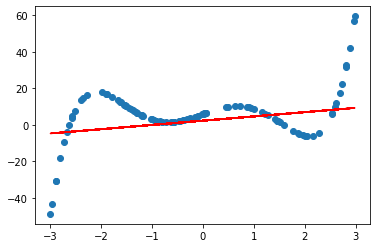

In [12]:
#Initial Plot

plt.plot(X_train, Prediction_vals, color = 'Red')
plt.scatter(X_train,Y_train)
plt.show()

#Implementing feature engineering through basis functions

Assuming linear relationship between x and y variables, gradient descent for linear regression in implemented above.

But the hypothetical function relating these two variables are non linear to each other and hence we need to implement feature engineering through basis functions

# Polynomial Basis Function

In [13]:
print(Y_train.shape)

(100, 1)


In [14]:
print("X_train shape : ", X_train.shape)
print("Y_train shape : ", Y_train.shape)
print("X_test shape :  ", X_test.shape)
print("Y_test shape:  ", Y_test.shape)

X_train shape :  (100, 1)
Y_train shape :  (100, 1)
X_test shape :   (100, 1)
Y_test shape:   (100, 1)


In [15]:
def x_features(X_train, deg_of_x):
  tmp = X_train.copy()

  for i in deg_of_x:
    X_train = np.append(X_train, tmp**i, axis=1)

  return X_train


#New training block after adding polynomial basis function based features

In [16]:
#Gradient Descent Block

def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

In [17]:
def trainining_basis_1(X_train,Y_train,deg_of_x, alpha,n_iter):
  New_X_train = x_features(X_train, deg_of_x)

  [c,d] = New_X_train.shape

  Weights_new = np.zeros((d,1))
  bias_new = 0

  New_Loss = []

  for i in range(n_iter):
    y_hyp = np.dot(New_X_train, Weights_new) + bias_new
    diff_weights, diff_bias = gradients(New_X_train, Y_train, y_hyp)  
    #print("iteration:", i, "Loss: ", loss_function(X_train,Y_train,W,b))
    l = loss_function(New_X_train, Y_train, Weights_new, bias_new)

    Weights_new -= alpha*diff_weights
    bias_new -= alpha*diff_bias
    New_Loss.append(l)
  return Weights_new, bias_new, New_Loss


In [18]:
def prediction_basis(X_train, Weights_new, bias_new, deg_of_x):
    
    # X --> Input.
    # w --> weights (parameter).
    # b --> bias (parameter).
    #degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    
    # Adding degrees to input X.
    x1 = x_features(X_train, deg_of_x)
    
    # Returning predictions.
    return np.dot(x1, Weights_new) + bias_new

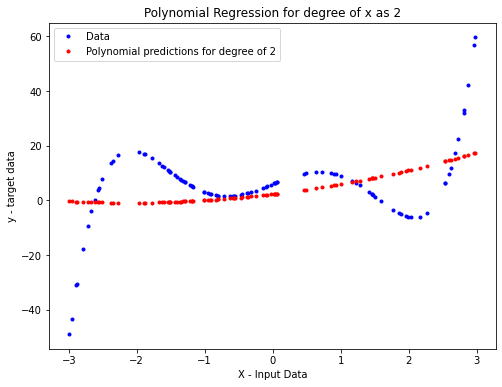

In [19]:
Weights_new,bias_new,New_Loss = trainining_basis_1(X_train,Y_train,deg_of_x=[2], n_iter=10000,alpha = 0.0001)

#Plots

fig = plt.figure(figsize=(8,6))
plt.plot(X_train, Y_train, 'b.')
plt.plot(X_train, prediction_basis(X_train, Weights_new, bias_new, deg_of_x=[2]), 'r.')
plt.legend(["Data", "Polynomial predictions for degree of 2"])
plt.xlabel('X - Input Data')
plt.ylabel('y - target data')
plt.title('Polynomial Regression for degree of x as 2')
plt.show()

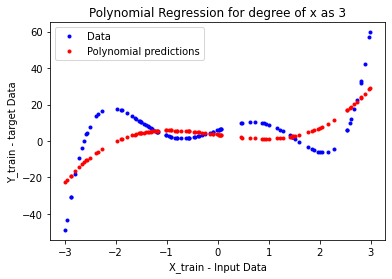

In [27]:
Weights_new,bias_new,New_Loss = trainining_basis_1(X_train,Y_train,deg_of_x=[3], n_iter=10000,alpha = 0.0001)

#Plots

fig = plt.figure()
plt.plot(X_train, Y_train, 'b.')
plt.plot(X_train, prediction_basis(X_train, Weights_new, bias_new, deg_of_x=[3]), 'r.')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X_train - Input Data')
plt.ylabel('Y_train - target Data')
plt.title('Polynomial Regression for degree of x as 3')
plt.show()


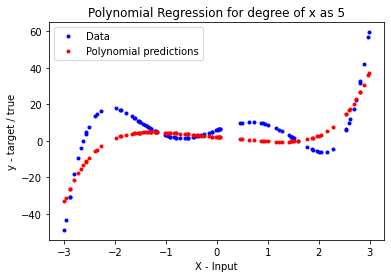

In [64]:
Weights_new,bias_new,New_Loss = trainining_basis_1(X_train,Y_train,deg_of_x=[5], n_iter=500000,alpha = 0.000001)

#Plots

fig = plt.figure()
plt.plot(X_train, Y_train, 'b.')
plt.plot(X_train, prediction_basis(X_train, Weights_new, bias_new, deg_of_x=[5]), 'r.')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression for degree of x as 5')
plt.show()